In [1]:
import torch

In [3]:
torch.cuda.is_available()

False

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]]).to(device)

In [5]:
tensor.shape

torch.Size([2, 3])

In [6]:
tensor.view(-1,1)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

In [7]:
torch.exp(tensor)

tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5981, 148.4132, 403.4288]])

In [8]:
torch.exp(tensor) / torch.sum(torch.exp(tensor), dim=1)

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [9]:
torch.sum(torch.exp(tensor), dim=1).numpy().shape

(2,)

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# --- 1. Create datasets ---
np.random.seed(42)
n = 800

# Features
age = np.random.randint(20, 70, n)
exercise = np.random.randint(0, 10, n)

# --- Case A: No interaction (additive) ---
risk_no_inter = 0.3*age - 5*exercise
prob_no_inter = 1 / (1 + np.exp(-(risk_no_inter - 50)))
y_no_inter = np.random.binomial(1, prob_no_inter)

# --- Case B: With interaction ---
risk_inter = 0.3*age - 5*exercise + 0.2*age*exercise
prob_inter = 1 / (1 + np.exp(-(risk_inter - 80)))
y_inter = np.random.binomial(1, prob_inter)

# --- 2. Train models ---
X_no_inter = pd.DataFrame({"Age": age, "Exercise": exercise})
X_inter = X_no_inter.copy()

model_no_inter = RandomForestClassifier(n_estimators=200, random_state=42).fit(X_no_inter, y_no_inter)
model_inter = RandomForestClassifier(n_estimators=200, random_state=42).fit(X_inter, y_inter)

# --- 3. SHAP explanations ---
explainer_no_inter = shap.TreeExplainer(model_no_inter)
shap_no_inter = explainer_no_inter(X_no_inter)

explainer_inter = shap.TreeExplainer(model_inter)
shap_inter = explainer_inter(X_inter)


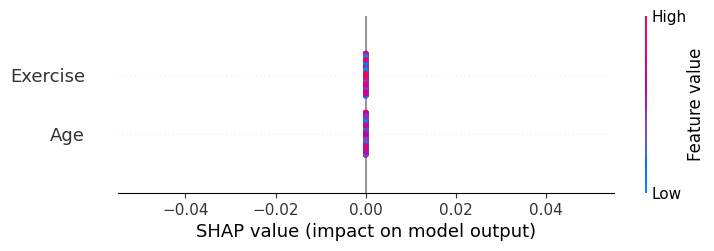

In [22]:
shap.plots.beeswarm(shap_no_inter)

Case A: No Interaction


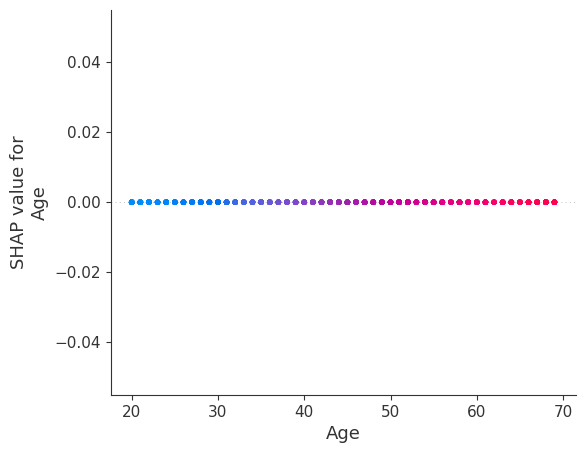

In [21]:
# --- 4. Plots ---
print("Case A: No Interaction")
shap.plots.scatter(shap_no_inter[:, "Age"],
                   color=shap_no_inter[:, "Exercise"],
                   x_jitter=0,
hist=False)

In [19]:
print("Case B: With Interaction")
shap.plots.scatter(shap_inter[:, "Age"], color=shap_inter[:, "Exercise"])

Case B: With Interaction


Exception: The passed Explanation object has multiple columns, please pass a single feature column to shap.plots.dependence like: shap_values[:,column]

In [3]:
import sys, os, json
import numpy as np
import pandas as pd
import seaborn as sns
import argparse, progressbar
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
sns.set()


In [2]:
x1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 20])
x2 = 5 - 10 * x1
print(x2)


[  -5  -15  -25  -35  -45  -55  -65  -75  -85 -195]


In [ ]:
# init fig and axes objects
sns.set(font_scale=2)
nrows = 1
ncols = 1
fig_height = nrows * 8
fig_width = ncols * 4
f: Figure
ax: Axes
f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_width, fig_height))
# %% ##################################################################
ax_ = sns.scatterplot()

In [8]:
y = np.array([[12],
              [16],
              [10]])
D = np.array([[1, 1, 2],
              [1, 2, 3],
              [1, 2, 1]])
D.shape

(3, 3)

In [9]:
D_inv = np.linalg.inv(D)

In [10]:
np.dot(D_inv, y)

array([[5.],
       [1.],
       [3.]])

In [11]:
D_coll = D
D_coll[:,2] = 5 - D_coll[:,1]
D_coll

array([[1, 1, 4],
       [1, 2, 3],
       [1, 2, 3]])

In [12]:
np.linalg.inv(D_coll)

LinAlgError: Singular matrix

In [13]:
x = np.array([[1,1,4],
              [1,2,3],
              [1,4,1]])
np.linalg.inv(x)

LinAlgError: Singular matrix